In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


![](https://th.bing.com/th/id/OIG2.i4CFP.wGhxdzEt7PhQRI?pid=ImgGn)

# Exploratory Data Analysis (EDA)

## Introduction
- `Definition`: Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics, often with visual methods.
- `Objective`: EDA helps in understanding the data, detecting patterns, spotting anomalies, and checking assumptions.

## Steps in EDA
- Data Collection
- Data Cleaning
- Data Transformation
- Data Visualization
- Feature Engineering
- Statistical Analysis
- Correlation Analysis

# Steps with Code
## Data Collection
- Collect the dataset. For demonstration, we'll use the famous Titanic dataset.

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load the Titanic dataset
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


##  Data Cleaning
- Handle Missing Values
- Remove Duplicates
- Fix Structural Errors

In [3]:
# Checking for missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
# Filling missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns='Cabin', inplace=True)

In [5]:
# Removing duplicates
df.drop_duplicates(inplace=True)
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Data Transformation
- Convert categorical variables into numerical
- Normalization/Scaling

In [6]:
# Converting categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [7]:
# Normalization
from sklearn.preprocessing import StandardScaler


In [8]:
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [9]:
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex       Age  SibSp  \
0                            Braund, Mr. Owen Harris    0 -0.565736      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  0.663861      1   
2                             Heikkinen, Miss. Laina    1 -0.258337      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1   
4                           Allen, Mr. William Henry    0  0.433312      0   

   Parch            Ticket      Fare  Embarked_Q  Embarked_S  
0      0         A/5 21171 -0.502445       False        True  
1      0          PC 17599  0.786845       False       False  
2      0  STON/O2. 3101282 -0.488854       False        True  
3      0            113803  0.420730       False        True  

## Data Visualization
- Histograms
- Violin Plots
- Scatter Plots
- Correlation Heatmap

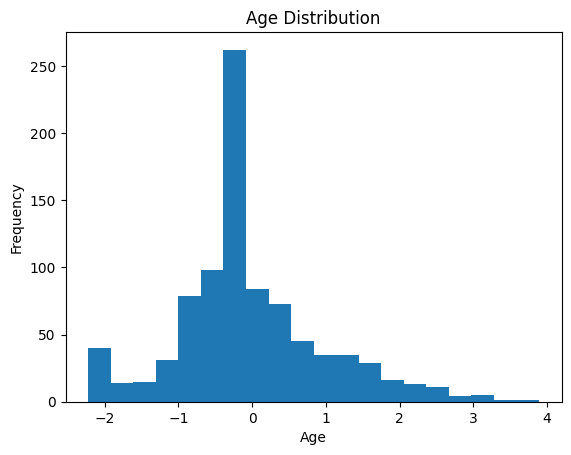

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
df['Age'].plot(kind='hist', bins=20)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


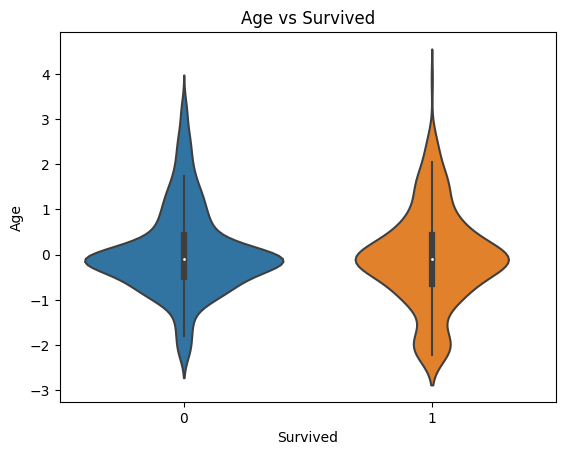

In [11]:
# Violin Plots

sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survived')
plt.show()


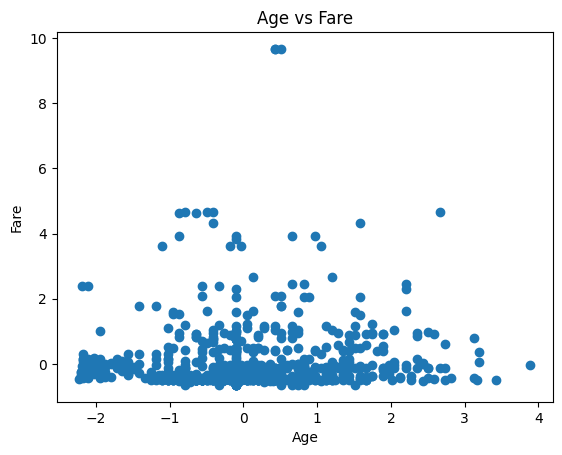

In [12]:
# Scatter Plots
plt.scatter(df['Age'], df['Fare'])
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

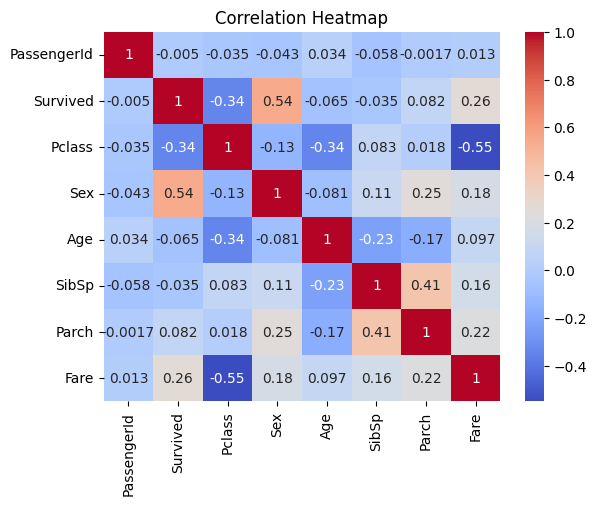

In [13]:
 # Dropping non-numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering
- Creating new features
- Feature selection

In [14]:
# Creating a new feature 'Family_Size'
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

In [15]:

# Dropping less important features
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

In [16]:
print(df.head())

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565736      1      0 -0.502445       False   
1         1       1    1  0.663861      1      0  0.786845       False   
2         1       3    1 -0.258337      0      0 -0.488854       False   
3         1       1    1  0.433312      1      0  0.420730       False   
4         0       3    0  0.433312      0      0 -0.486337       False   

   Embarked_S  Family_Size  
0        True            2  
1       False            2  
2        True            1  
3        True            2  
4        True            1  


##  Statistical Analysis
- Summary Statistics
- Group By Analysis

In [17]:
# Summary Statistics
print(df.describe())

         Survived      Pclass         Sex           Age       SibSp  \
count  891.000000  891.000000  891.000000  8.910000e+02  891.000000   
mean     0.383838    2.308642    0.352413  2.272780e-16    0.523008   
std      0.486592    0.836071    0.477990  1.000562e+00    1.102743   
min      0.000000    1.000000    0.000000 -2.224156e+00    0.000000   
25%      0.000000    2.000000    0.000000 -5.657365e-01    0.000000   
50%      0.000000    3.000000    0.000000 -1.046374e-01    0.000000   
75%      1.000000    3.000000    1.000000  4.333115e-01    1.000000   
max      1.000000    3.000000    1.000000  3.891554e+00    8.000000   

            Parch          Fare  Family_Size  
count  891.000000  8.910000e+02   891.000000  
mean     0.381594  3.987333e-18     1.904602  
std      0.806057  1.000562e+00     1.613459  
min      0.000000 -6.484217e-01     1.000000  
25%      0.000000 -4.891482e-01     1.000000  
50%      0.000000 -3.573909e-01     1.000000  
75%      0.000000 -2.424635e-02

In [18]:
# Group By Analysis
print(df.groupby('Survived').mean())

            Pclass       Sex       Age     SibSp     Parch      Fare  \
Survived                                                               
0         2.531876  0.147541  0.051232  0.553734  0.329690 -0.203085   
1         1.950292  0.681287 -0.082241  0.473684  0.464912  0.326005   

          Embarked_Q  Embarked_S  Family_Size  
Survived                                       
0           0.085610    0.777778     1.883424  
1           0.087719    0.640351     1.938596  


## Correlation Analysis
- Understanding relationships between features

In [21]:
# Correlation Analysis
sns.pairplot(df, hue='Survived', diag_kind='kde')
plt.show()


## Conclusion
- EDA is a crucial step in the data analysis process.
- It helps in understanding the underlying patterns and relationships in the data.
- Provides a solid foundation for further modeling and analysis.

<div style="text-align: center; padding: 20px; font-family: Arial, sans-serif;">
    <h2 style="color: #ff7f0e;">Thank You!</h2>
    <p style="font-size: 16px; color: #4CAF50;">
        <span style="color: #4CAF50;">Thank you for exploring this EDA notebook.</span> 
        I hope you found the insights and techniques valuable.
    </p>
</div>
